# Assignment 1 

## ECON8502 - Structural Microeconometrics

### Conor Bayliss

First, import the necessary packages and load the Data following the website.

In [1]:
using CSV, DataFrames, DataFramesMeta, StatsPlots, Statistics

In [3]:
data = @chain begin # Using DataFramesMeta to chain together commands

    CSV.read("C://Users//bayle/Documents//hw1_micro_labour_data//MainPanelFile.csv", DataFrame, missingstring="NA")

    @select :MID :year :wage :hrs :earn :SOI :CPIU :WelfH :FSInd # Selecting the columns we want

    @subset :year.>=1985 :year.<=2010 # Subsetting the data to the years we want

    @transform :AFDC = :WelfH.>0 # Creating a new column for AFDC; does this household receive welfare?
    # The @transform macro in DataFramesMeta is used to add new columns to a DataFrame or modify existing ones.

    @rename :FS = :FSInd  # Renaming the FSInd column to FS
    
end

Row,MID,year,wage,hrs,earn,SOI,CPIU,WelfH,FS,AFDC
,Int64,Int64,Float64?,Int64?,Float64?,Int64,Float64,Float64?,Int64?,Bool?
1,4031,1990,missing,missing,missing,43,0.758793,0.0,0,false
2,4031,1991,missing,missing,missing,43,0.790786,0.0,0,false
3,4031,1992,missing,missing,missing,43,0.814835,0.0,1,false
4,4031,1993,missing,missing,missing,43,0.839034,0.0,0,false
5,4031,1994,missing,0,0.0,43,0.860812,1704.0,1,true
6,4031,1995,missing,0,0.0,43,0.88496,1704.0,1,true
7,4031,1996,missing,0,0.0,43,0.910948,1704.0,1,true
8,4031,1997,missing,missing,missing,43,0.932244,missing,missing,missing
9,4031,1998,missing,0,0.0,43,0.946664,0.0,1,false


### Question 1

In this question, we are asked calculate average welfare participation (AFDC) by year and plot it. In particular, we are asked to comment on the pre- and post-1996 trends in the data. In 1996, as discussed in class, there were substantial reforms to welfare programmes in the United States. 

As an example, we are provided with code to calculate the average hours worked over time. I reproduce said code below to ensure that everything is working correctly, and then plot AFDC as required.

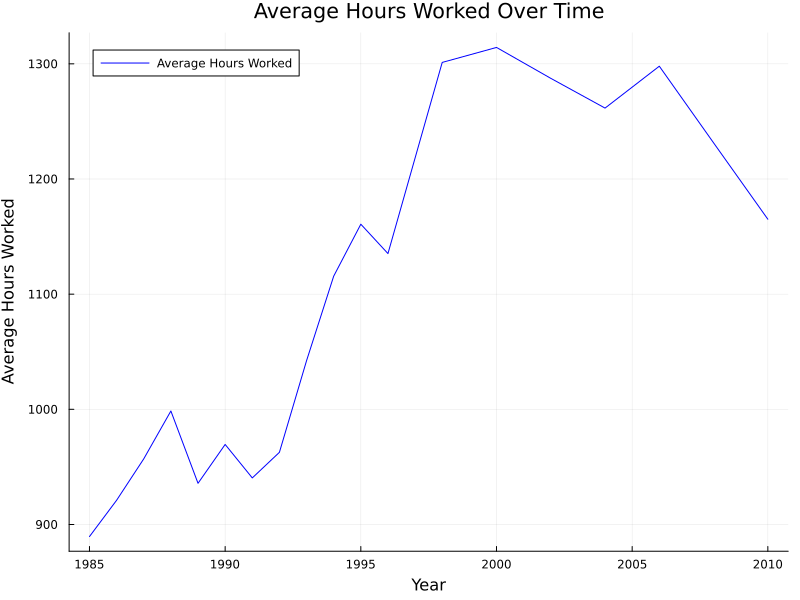

In [4]:
d = @chain data begin

    groupby(:year) # Grouping the data by year;  each group consists of rows that have the same value in the year column.

    @combine :Hours = mean(skipmissing(:hrs)) # Calculating the mean of the hours worked in each year

    @subset .!isnan.(:Hours) # Subsetting the data to remove any missing values in the Hours column
     
end

@df d plot(:year, :Hours, size = (800,600), label="Average Hours Worked", xlabel="Year", ylabel="Average Hours Worked", title="Average Hours Worked Over Time", legend=:topleft, color=:blue)

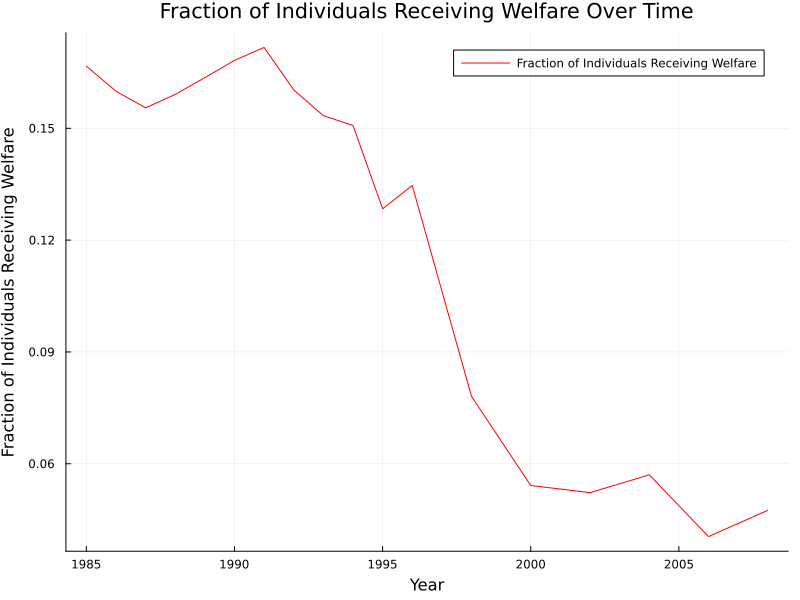

In [6]:
q1 = @chain data begin

    @transform :AFDC_Flag = passmissing(ifelse).(:AFDC, 1, 0) # Create a new column AFDC_Flag 0 or 1 if the ind receives welfare; preserving missing values

    @subset .!ismissing.(:AFDC_Flag) # drop rows with missing values in the AFDC_Flag column

    groupby(:year) # Grouping the data by year

    @combine :AFDC_Fraction = mean(skipmissing(:AFDC_Flag)) # Calculating the fraction of households receiving welfare in each year
    
end

@df q1 plot(:year, :AFDC_Fraction, size = (800,600), label="Fraction of Individuals Receiving Welfare", xlabel="Year", ylabel="Fraction of Individuals Receiving Welfare", title="Fraction of Individuals Receiving Welfare Over Time", legend=:topright, color=:red)
    

### Question 2

In this question, we are asked to write code to do the following:
* Deflate earnings by CPI
* Calculate average earnings for each individual
* Drop individuals with fewer than 10 years of data
* Categorise individuals by whether their average earnings is below or above the median across individuals.
* Plot average participation in each year for individuals in each of these two categories.

In [7]:
q2 = @chain data begin
    
    @transform :earn = :earn ./ :CPIU # Adjusting earnings for inflation
 
    #groupby([:MID, :year]) # MID identifies individuals

    groupby(:MID) # MID identifies individuals

    @combine :T = sum(.!ismissing.(:earn)) :earn = mean(skipmissing(:earn))
    # Creates a new column T which sums the 0s and 1s from the .!ismissing.(earn) command (0 if missing, 1 if not missing
    # then calculates the mean of the earnings for each individual (skipping missing values)
    @subset :T .>= 10 # Subsetting the data to include only individuals with at least 10 non-missing earnings observations
    
end

median_earnings = median(q2.earn) # Calculate median earnings

# Create a new column which categorises individuals as above or below the median earnings
q2 = @transform q2 :Earnings_Category = :earn.>median_earnings

Row,MID,T,earn,Earnings_Category
,Int64,Int64,Float64,Bool
1,4031,10,40.0,false
2,4179,16,6089.12,false
3,7030,11,4500.53,false
4,41007,12,16147.7,true
5,41008,11,0.0,false
6,45030,11,14374.3,true
7,45031,11,17693.5,true
8,47031,11,15946.7,true
9,84005,18,30769.6,true


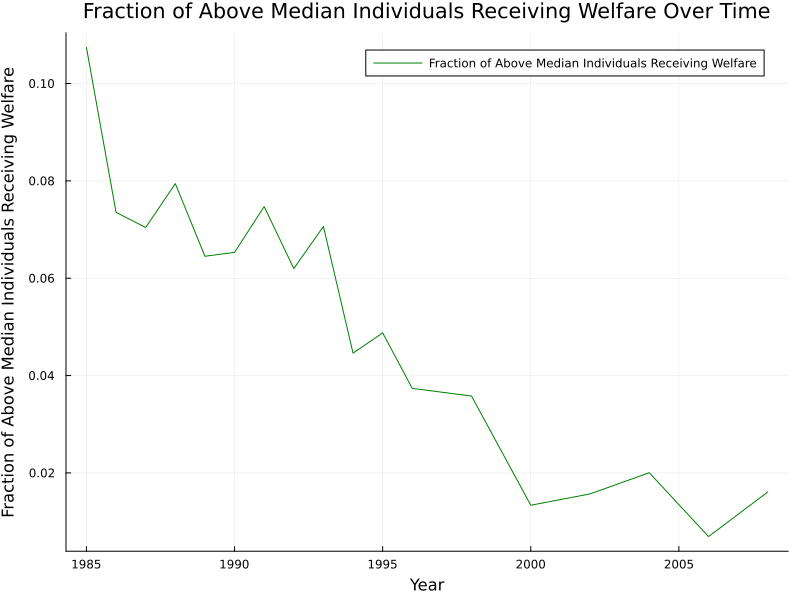

In [8]:
merged_data = innerjoin(data, q2, on=:MID, makeunique=true) # Merge the original data with the earnings data

high_merged_data = @chain merged_data begin

    @transform :AFDC_Flag = passmissing(ifelse).(:AFDC, 1, 0)

    @subset(.!ismissing.(:AFDC_Flag) .& :Earnings_Category .== true)
    
    groupby(:year)

    @combine :AFDC_Fraction = mean(skipmissing(:AFDC_Flag))

end

@df high_merged_data plot(:year, :AFDC_Fraction, size = (800, 600), label="Fraction of Above Median Individuals Receiving Welfare", xlabel="Year", ylabel="Fraction of Above Median Individuals Receiving Welfare", title="Fraction of Above Median Individuals Receiving Welfare Over Time", legend=:topright, color=:green)

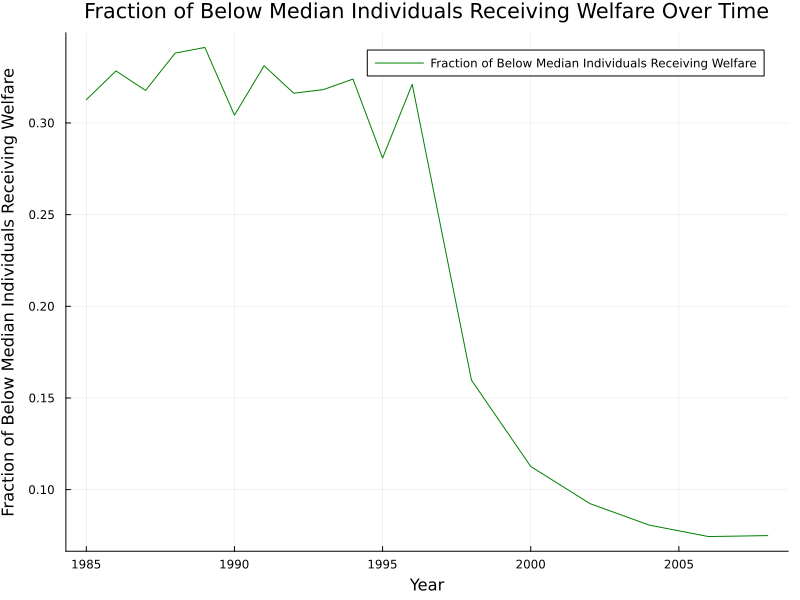

In [9]:
low_merged_data = @chain merged_data begin

    @transform :AFDC_Flag = passmissing(ifelse).(:AFDC, 1, 0)

    @subset(.!ismissing.(:AFDC_Flag) .& :Earnings_Category .== false)
    
    groupby(:year)

    @combine :AFDC_Fraction = mean(skipmissing(:AFDC_Flag))

end

low_merged_data = filter(row -> isfinite(row.AFDC_Fraction), low_merged_data)

@df low_merged_data plot(:year, :AFDC_Fraction, size = (800, 600), label="Fraction of Below Median Individuals Receiving Welfare", xlabel="Year", ylabel="Fraction of Below Median Individuals Receiving Welfare", title="Fraction of Below Median Individuals Receiving Welfare Over Time", legend=:topright, color=:green)

### Question 3

In this question, we are asked to use the Transfers.jl file to create a graph that represents total net **transfers** for a single mother with two kids in the years 1990 and 2000 in the states of Mississippi and New York.

First, let us include the relevant file and run the example from the Assignment web page.

In [11]:
include("C:\\Users\\bayle\\Documents\\Github\\micro_labour\\Transfers.jl")
Transfers.budget(500.,0.,23,2000,2,1.,2) ## Example: 
                                         ## a household with 500 in labour income, 
                                         ## 0 in non-labour income, 
                                         ## living in Michigan (SOI code 23), 
                                         ## in the year 2000, 
                                         ## 2 children, 
                                         ## set cpi to 1 if nominal income, 
                                         ## and p to 0 if no programmes, 1 if food stamps, 2 if food stamps and welfare 

978.5408333333334

Since we need to work with Mississippi and New York data, we note here that that the relevant SOI codes are 25 (Mississippi) and 33 (New York). Also, note that the above function gives net **income**, not net **transfers**. Ofcourse, in the above we assumed a nomninal labour income of $500 a month, and so net transfers are the difference between the two.

Let's create a function which will calculate net transfers.

In [34]:
function calculate_transfers(range, non_labour_income, state_code, year, num_children, cpi, p)

    transfers = []

    for labour_income in range

        net_income = Transfers.budget(labour_income, non_labour_income, state_code, year, num_children, cpi, p) - labour_income

        push!(transfers, net_income)

    end

    return transfers

end

calculate_transfers (generic function with 2 methods)

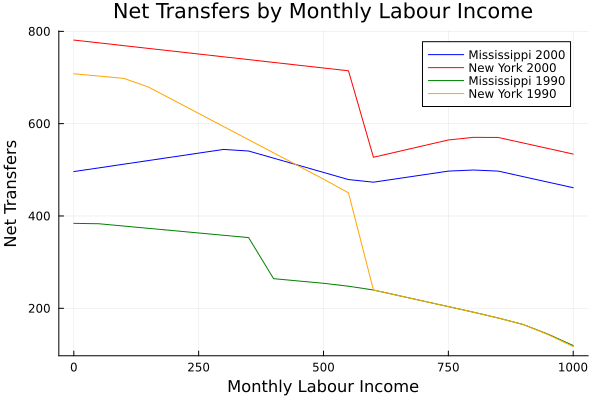

In [41]:
transfers_2000_mississippi = calculate_transfers(0.:50.:1000., 0., 25, 2000, 2, 1., 2)
transfers_2000_ny = calculate_transfers(0.:50.:1000., 0., 33, 2000, 2, 1., 2)
transfers_1990_mississippi = calculate_transfers(0.:50.:1000., 0., 25, 1990, 2, 1., 2)
transfers_1990_ny = calculate_transfers(0.:50.:1000., 0., 33, 1990, 2, 1., 2)
plot(0.:50.:1000., transfers_2000_mississippi, label="Mississippi 2000", xlabel="Monthly Labour Income", ylabel="Net Transfers", title="Net Transfers by Monthly Labour Income", legend=:topright, color=:blue)
plot!(0.:50.:1000., transfers_2000_ny, label="New York 2000", color=:red)
plot!(0.:50.:1000., transfers_1990_mississippi, label="Mississippi 1990", color=:green)
plot!(0.:50.:1000., transfers_1990_ny, label="New York 1990", color=:orange)
